`Prabhu kiran Konda`  
`20K45A0215`  
`Assignment 5`  
[`Github/PrabhuKiran8790`](https://github.com/Prabhukiran8790)

## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns


## Modifing data

In [2]:
dataset = pd.read_csv('load_data_modified.csv')
dataset = dataset.rename(columns={
    'X1':'L(t-3)',
    'X2':'L(t-2)',
    'X3':'L(t-1)',
    'Y':'L(t)'    
})

dataset.tail()

,L(t-3),L(t-2),L(t-1),L(t)
2176,5315.50800,5294.62008,5045.52384,4626.51840
2177,5294.62008,5045.52384,4626.51840,4567.90752
2178,5045.52384,4626.51840,4567.90752,4723.63164
2179,4626.51840,4567.90752,4723.63164,5150.27520
2180,4567.90752,4723.63164,5150.27520,6938.37468


In [3]:
dataset.isnull().sum()

L(t-3)    0
L(t-2)    0
L(t-1)    0
L(t)      0
dtype: int64

In [7]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
L(t-3),2181.0,6028.708574,1066.422424,3377.9196,5260.01472,5935.9104,6738.6924,8841.66948
L(t-2),2181.0,6028.328844,1066.739714,3377.9196,5260.01472,5935.9104,6738.6924,8841.66948
L(t-1),2181.0,6028.405462,1066.670610,3377.9196,5260.01472,5935.9104,6738.6924,8841.66948
L(t),2181.0,6029.345387,1066.568792,3377.9196,5260.01472,5935.9104,6738.6924,8841.66948


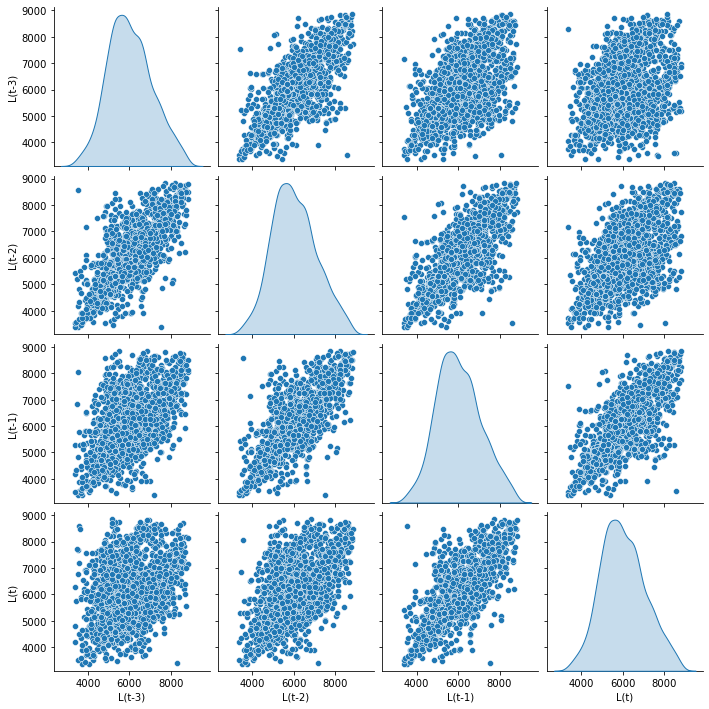

In [60]:
sns.pairplot(dataset, diag_kind='kde')

In [69]:
import plotly.express as px

title= 'Plots'
fig = px.scatter_matrix(dataset)
fig.update_layout(title=title,
dragmode='select',
width=1000,
height=1000,
hovermode='closest')

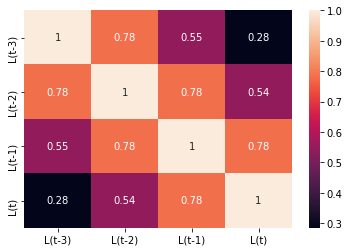

In [55]:
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

## Detecting Outliers

In [4]:
outliers = []
def detect_outliers_zscore(dataset):
    thres = 3
    mean = np.mean(dataset)
    std = np.std(dataset)
    # print(mean, std)
    for i in dataset:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

sample_outliers_X1 = detect_outliers_zscore(dataset['L(t-3)'])
sample_outliers_X2 = detect_outliers_zscore(dataset['L(t-2)'])
sample_outliers_X3 = detect_outliers_zscore(dataset['L(t-1)'])
sample_outliers_Y = detect_outliers_zscore(dataset['L(t)'])

print(f"Outliers in '{dataset.columns[0]}' column from Z-scores method: {len(sample_outliers_X1)}")
print(f"Outliers in '{dataset.columns[1]}' column from Z-scores method: {len(sample_outliers_X2)}")
print(f"Outliers in '{dataset.columns[2]}' column from Z-scores method: {len(sample_outliers_X3)}")

print(f"Outliers in '{dataset.columns[3]}' column from Z-scores method: {len(sample_outliers_Y)}")

Outliers in 'L(t-3)' column from Z-scores method: 0
Outliers in 'L(t-2)' column from Z-scores method: 0
Outliers in 'L(t-1)' column from Z-scores method: 0
Outliers in 'L(t)' column from Z-scores method: 0


# Data Split
- Training Data = 90%
- Testing Data = 10

In [12]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(dataset, train_size = 0.9, test_size = 0.1, random_state = 100)

## Data Normalising

In [13]:
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

scaler = MinMaxScaler()

# Applying scaler()
num_vars = ['L(t-3)', 'L(t-2)', 'L(t-1)', 'L(t)']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_train

,L(t-3),L(t-2),L(t-1),L(t)
1577,0.308408,0.250892,0.242532,0.308408
2151,0.061510,0.064763,0.094234,0.126473
805,0.797124,1.000000,0.993666,0.934695
361,0.483809,0.500243,0.623491,0.643348
864,0.419845,0.452198,0.564035,0.631137
...,...,...,...,...
350,0.734359,0.956264,0.960315,0.938347
1930,0.721320,0.594648,0.249465,0.331802
79,0.734359,0.698240,0.555476,0.564891
1859,0.753188,0.506519,0.297338,0.332801


In [14]:
# Dividing the training data set into X and Y
y_train = df_train.pop('L(t)')
X_train = df_train
y_test = df_test.pop('L(t)')
X_test = df_test

## Model Trainig

In [16]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [17]:
print(f"""
Weights are {lreg.coef_}
Bias is {lreg.intercept_}      
""")


Weights are [-0.20873431  0.0233503   0.88128096]
Bias is 0.1477747343473147      



## Error Metrics

In [19]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


y_pred_test =  lreg.predict(X_test)
y_pred_train =  lreg.predict(X_train)

#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('Root mean square error is :', rmse) 
mse = (mean_squared_error(y_train, y_pred_train)) 
print('Mean square error is :', mse) 
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error is :', mae)

Root mean square error is : 0.1177424862121238
Mean square error is : 0.013863293059412161
Mean absolute error is : 0.08107864388557849


In [22]:

# Testing Errors
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('Root mean square error is :', rmse) 
mse = (mean_squared_error(y_test, y_pred_test)) 
print('Mean square error is :', mse) 
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error is :', mae)

Root mean square error is : 0.11445284797263094
Mean square error is : 0.01309945440904617
Mean absolute error is : 0.08284900549534499


In [49]:
print("Training set score:",lreg.score(X_train,y_train))
print("Test set score:",lreg.score(X_test,y_test))

Training set score: 0.6410779553123142
Test set score: 0.6366997803940703


# Deploying

In [23]:
import pickle
# Save the model
filename = 'mlrmodel.model'
pickle.dump(lreg, open(filename, 'wb'))

In [52]:
load1 = input("Enter load at t-3 hours")
load2 = input("Enter load at t-2 hours")
load3 = input("Enter load at t-1 hours")


out = lreg.predict([[load1, load2, load2]])
print(f"Predicted Load is {out}")

Predicted Load is [2859.11333881]


## Model is Deployed to Heroku.
[`https://load-estimate.herokuapp.com/`](https://load-estimate.herokuapp.com/)